In [1]:
!pip install -q "transformers== 4.40.2"

In [2]:
from transformers import pipeline
import skimage
import numpy as np
from PIL import Image

In [3]:
model = "google/owlv2-base-patch16-ensemble"
detector = pipeline(model=model, task="zero-shot-object-detection")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/620M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/425 [00:00<?, ?B/s]

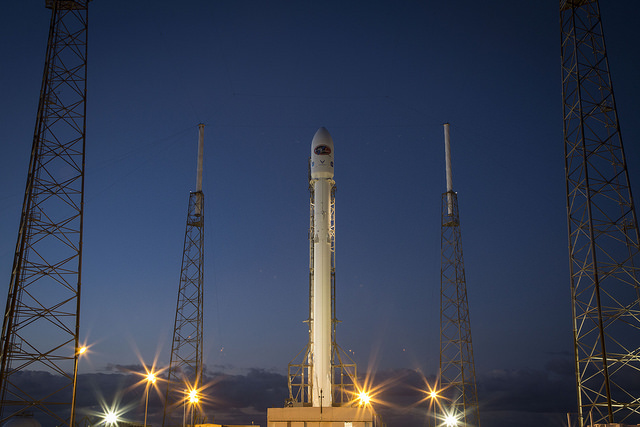

In [11]:
# image = skimage.data.astronaut()
# image = skimage.data.camera()
image = skimage.data.rocket()
image = Image.fromarray(np.uint8(image)).convert("RGB")

image

In [16]:
predictions = detector(
    image,
    # candidate_labels=["human face", "rocket", "nasa badge", "star-spangled banner"],
    # candidate_labels=["human", "camera", "tripod", "building"],
    candidate_labels=["rocket", "tower", "light"],
)
predictions

[{'score': 0.6760573983192444,
  'label': 'rocket',
  'box': {'xmin': 308, 'ymin': 83, 'xmax': 334, 'ymax': 274}},
 {'score': 0.47777628898620605,
  'label': 'tower',
  'box': {'xmin': 433, 'ymin': 74, 'xmax': 487, 'ymax': 279}},
 {'score': 0.43856149911880493,
  'label': 'tower',
  'box': {'xmin': 269, 'ymin': 75, 'xmax': 372, 'ymax': 285}},
 {'score': 0.39057648181915283,
  'label': 'tower',
  'box': {'xmin': 155, 'ymin': 64, 'xmax': 210, 'ymax': 283}},
 {'score': 0.3783092796802521,
  'label': 'tower',
  'box': {'xmin': 554, 'ymin': -3, 'xmax': 640, 'ymax': 283}},
 {'score': 0.32312458753585815,
  'label': 'tower',
  'box': {'xmin': 0, 'ymin': -1, 'xmax': 94, 'ymax': 283}},
 {'score': 0.3146723806858063,
  'label': 'tower',
  'box': {'xmin': 308, 'ymin': 83, 'xmax': 334, 'ymax': 274}},
 {'score': 0.2946711480617523,
  'label': 'light',
  'box': {'xmin': 358, 'ymin': 261, 'xmax': 371, 'ymax': 270}},
 {'score': 0.2832186818122864,
  'label': 'light',
  'box': {'xmin': 188, 'ymin': 260

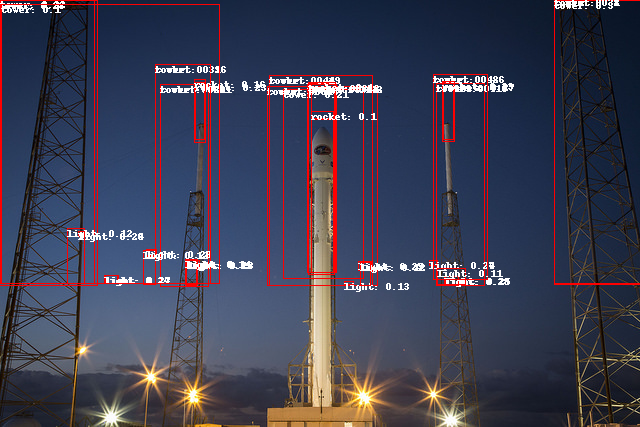

In [17]:
# visualize the predictions
from PIL import ImageDraw

draw = ImageDraw.Draw(image)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]

    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="white")

image